Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
import cv2
import pickle
import random

In [17]:

from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Sequential
from matplotlib.image import imread
import matplotlib.pyplot as plt
import tensorflow as tf

Data Path

In [41]:
train = r'D:/ML/Data_sets/Tomatod/tomato/train'
test = r'D:/ML/Data_sets/Tomatod/tomato/val'
size=256

Data Augumentation

In [42]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)



In [43]:
X_train = datagen.flow_from_directory(train,
                                      target_size=(size,size),
                                      batch_size=32,
                                      class_mode='categorical',
                                      subset='training')
X_test = ImageDataGenerator(rescale=1./255).flow_from_directory(test,
                                     target_size=(size,size),
                                     batch_size=32,
                                     class_mode='categorical',
                                     subset='training')


Found 4000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [44]:
X_test.class_indices.keys()

dict_keys(['Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy'])

Call back Setup


In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

checkpoint=ModelCheckpoint(r'model70epochs.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=5,
                       verbose=1,
                       restore_best_weights=True)
callbacks=[checkpoint,earlystop]

Modelling Starts

In [46]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(size,size,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

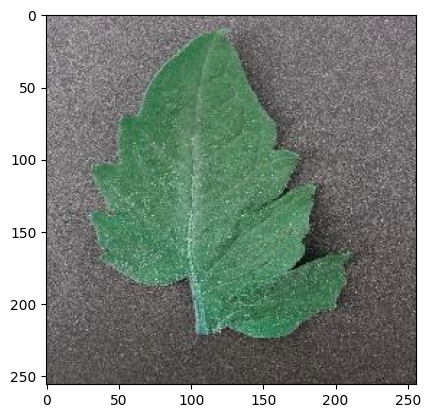

In [47]:
#from tensorflow.keras.preprocessing import image

img = "D:/ML/Data_sets/Tomatod/tomato/test/healthy.jpg"
img1 = cv2.imread(img)
plt.imshow(img1)

Compiling the Model

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 16)       0

In [51]:
history= model.fit(x=X_train, validation_data=X_test,
                    epochs=10,
                    steps_per_epoch=X_train.samples//32,
                    validation_steps=X_test.samples//32,
                    callbacks=callbacks)

Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 0.3917 - accuracy: 0.8618
Epoch 1: val_loss improved from 0.56422 to 0.45718, saving model to model70epochs.h5
125/125 [==============================] - 150s 1s/step - loss: 0.3917 - accuracy: 0.8618 - val_loss: 0.4572 - val_accuracy: 0.8625
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 0.3506 - accuracy: 0.8705
Epoch 2: val_loss improved from 0.45718 to 0.34627, saving model to model70epochs.h5
125/125 [==============================] - 155s 1s/step - loss: 0.3506 - accuracy: 0.8705 - val_loss: 0.3463 - val_accuracy: 0.8687
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 0.2914 - accuracy: 0.8967
Epoch 3: val_loss did not improve from 0.34627
125/125 [==============================] - 151s 1s/step - loss: 0.2914 - accuracy: 0.8967 - val_loss: 0.5776 - val_accuracy: 0.8000
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.9075
Epo

Output and Graph

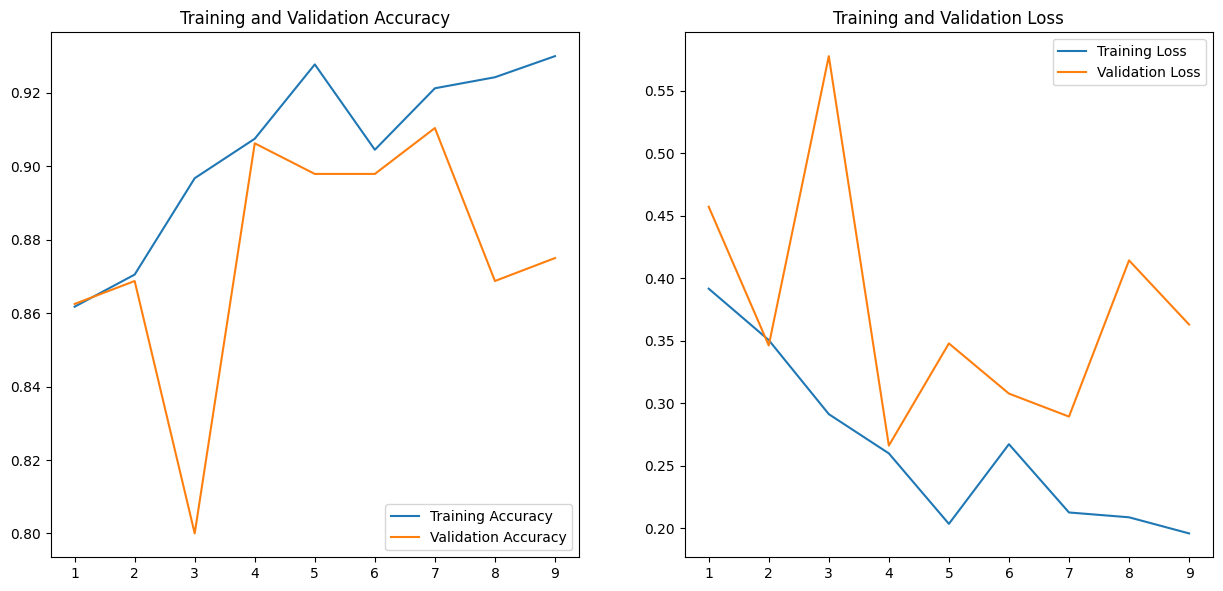

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1,10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
model.save('tom_leaf_dse_model.h5')

Testing the model

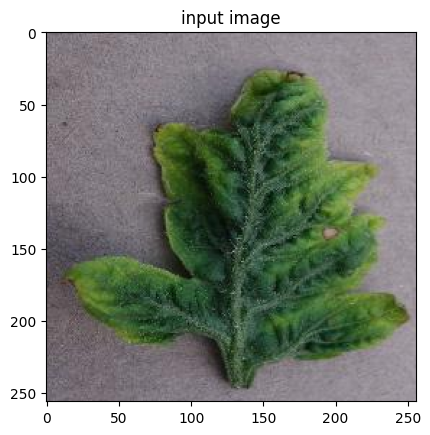

1/1 [==============================] - 0s 65ms/step
Predicted as Yellow_Leaf_Curl


In [119]:
path = "D:/ML/Data_sets/Tomatod/tomato/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1b4ded19-b85b-4916-a158-6d8203062996___YLCV_GCREC 2230.JPG"
img = load_img(path,target_size=(256,256))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

plt.imshow(input_arr[0])
plt.title('input image')
plt.axis = False
plt.show()
pred = np.argmax(model.predict(input_arr))

if pred == 0:
    print("Predicted as Bacterial_Spot")
elif pred == 1:
    print("Predicted as Late_Blight")
elif pred == 2:
    print("Predicted as Septoria_Leaf_Spot")
elif pred == 3:
    print("Predicted as Yellow_Leaf_Curl")
elif pred == 4:
    print("Predicted as Healthy")



Reducing the Size of the Model

In [20]:
import os
from os.path import join, getsize

In [25]:
sz = getsize('tom_leaf_dse_model.h5')
print('Model size in MB is', sz/(1024*1024))

Model size in MB is 37.102699279785156


In [35]:
# Convert the model to a format that can be run on the Arduino device
TF_LITE_MODEL_FILE_NAME = "tfinal_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmpwa_ic2w5\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmpwa_ic2w5\assets


12954908

In [32]:
syz = getsize('tfinal_model.tflite')
print('Model size in MB is', syz/(1024*1024))

Model size in MB is 12.35476303100586


2nd try

In [39]:
# Convert the model to a format that can be run on the Arduino device
TF_LITE_MODEL_FILE_NAME = "tfinal_model_1.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_model_1 = tf_lite_converter.convert()
tflite_model_1_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_1_name, "wb").write(tflite_model_1)

AttributeError: 'bytes' object has no attribute 'tflite'

b
